<a href="https://colab.research.google.com/github/LuchoValr/Pruebas-codigos/blob/main/Vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn
!pip install keras
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
wine=pd.read_excel('/content/drive/MyDrive/vinos.xlsx')

In [5]:
X=wine.iloc[:,1:13].values
Y_num=wine.iloc[:,0].values

In [6]:
n_clases=3
Y=np_utils.to_categorical(Y_num,n_clases)

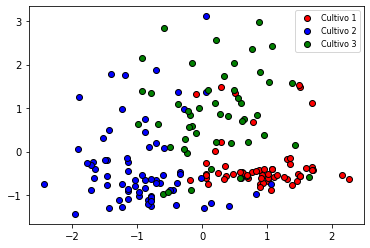

In [7]:
idx0=np.where(Y_num==0)
idx1=np.where(Y_num==1)
idx2=np.where(Y_num==2)
plt.scatter(X[idx0,0],X[idx0,1],c='red',edgecolor='k',label='Cultivo 1')
plt.scatter(X[idx1,0],X[idx1,1],c='blue',edgecolor='k',label='Cultivo 2')
plt.scatter(X[idx2,0],X[idx2,1],c='green',edgecolor='k',label='Cultivo 3')
plt.legend(fontsize=8,loc='upper right')
plt.show()

In [17]:
np.random.seed(1)
input_dim=X.shape[1]
output_dim=Y.shape[1]

modelo=Sequential()
modelo.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))
modelo.add(Dense(output_dim,activation='softmax'))
modelo.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['acc'])

history=modelo.fit(X,Y,epochs=4000,batch_size=X.shape[0],verbose=2)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 - 0s - loss: 0.8214 - acc: 0.7978 - 6ms/epoch - 6ms/step
Epoch 317/4000
1/1 - 0s - loss: 0.8208 - acc: 0.8034 - 5ms/epoch - 5ms/step
Epoch 318/4000
1/1 - 0s - loss: 0.8203 - acc: 0.8034 - 5ms/epoch - 5ms/step
Epoch 319/4000
1/1 - 0s - loss: 0.8198 - acc: 0.8034 - 6ms/epoch - 6ms/step
Epoch 320/4000
1/1 - 0s - loss: 0.8193 - acc: 0.8034 - 6ms/epoch - 6ms/step
Epoch 321/4000
1/1 - 0s - loss: 0.8188 - acc: 0.8034 - 6ms/epoch - 6ms/step
Epoch 322/4000
1/1 - 0s - loss: 0.8182 - acc: 0.8090 - 7ms/epoch - 7ms/step
Epoch 323/4000
1/1 - 0s - loss: 0.8177 - acc: 0.8090 - 6ms/epoch - 6ms/step
Epoch 324/4000
1/1 - 0s - loss: 0.8172 - acc: 0.8090 - 5ms/epoch - 5ms/step
Epoch 325/4000
1/1 - 0s - loss: 0.8167 - acc: 0.8090 - 9ms/epoch - 9ms/step
Epoch 326/4000
1/1 - 0s - loss: 0.8161 - acc: 0.8090 - 10ms/epoch - 10ms/step
Epoch 327/4000
1/1 - 0s - loss: 0.8156 - acc: 0.8090 - 10ms/epoch - 10ms/step
Epoch 328/4000
1/1 - 0s - loss: 0.8151

In [29]:
test_loss, test_acc = modelo.evaluate(X, Y)
print('Test accuracy:', test_acc,'Test loss:',test_loss)

6/6 [==============================] - 0s 3ms/step - loss: 0.1021 - acc: 0.9944
Test accuracy: 0.9943820238113403 Test loss: 0.10212646424770355


In [9]:
class Onehot2Int(object):

    def __init__(self, modelo):
        self.modelo = modelo

    def predict(self, X):
        y_pred = self.modelo.predict(X)
        return np.argmax(y_pred, axis=1)

In [10]:
keras_model_no_ohe = Onehot2Int(modelo)


3888/3888 [==============================] - 5s 1ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


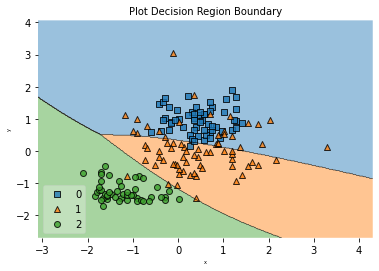

In [36]:
from mlxtend.plotting import plot_decision_regions
value=0.5
widght=500

plot_decision_regions(X, Y_num, clf=keras_model_no_ohe, legend=3,feature_index=[10,6],
                      filler_feature_values={0: value, 2:value, 4:value,5:value,1:value,7:value,8:value,9:value,3:value,11:value},
                      filler_feature_ranges={0: widght, 2: widght,4:widght,5:widght,1:widght,7:widght,8:widght,9:widght,3:widght,11:widght})
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()
